# 0. get data 

In [1]:
import pandas as pd 
import numpy as np 
import tushare as ts 
ts.set_token('7dd7dc496ee9de8e4c8052e54ec22ac23f8f1ad8b05aa42603a1e472')
pro = ts.pro_api()


df = pd.read_csv('stock_basic_v20200715.csv')
df.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,Unnamed: 0,ts_code,symbol,name,area,industry,list_date
0,0,000001.SZ,1,平安银行,深圳,银行,19910403
1,1,000002.SZ,2,万科A,深圳,全国地产,19910129
2,2,000004.SZ,4,国农科技,深圳,生物制药,19910114
3,3,000005.SZ,5,世纪星源,深圳,环境保护,19901210
4,4,000006.SZ,6,深振业A,深圳,区域地产,19920427


In [14]:
df.loc[df['industry']== '证券']

,Unnamed: 0,ts_code,symbol,name,area,industry,list_date
67,67,000166.SZ,166,申万宏源,新疆,证券,20150126
236,236,000686.SZ,686,东北证券,吉林,证券,19970227
255,255,000712.SZ,712,锦龙股份,广东,证券,19970415
269,269,000728.SZ,728,国元证券,安徽,证券,19970616
279,279,000750.SZ,750,国海证券,广西,证券,19970709
294,294,000776.SZ,776,广发证券,广东,证券,19970611
300,300,000783.SZ,783,长江证券,湖北,证券,19970731
951,951,002500.SZ,2500,山西证券,山西,证券,20101115
1119,1119,002670.SZ,2670,国盛金控,广东,证券,20120416
1122,1122,002673.SZ,2673,西部证券,陕西,证券,20120503


In [15]:
name_ls = df.loc[df['industry']== '证券'].name
ts_code_ls = df.loc[df['industry']== '证券'].ts_code 
for i in range(len(name_ls)): 
    name = name_ls.iloc[i]
    ts_code = ts_code_ls.iloc[i]
    print(name, ts_code)
    dd = pro.daily(ts_code=ts_code, start_date='20180701', end_date='20200716')
    dd.to_csv('daily_{name}_{ts_code}.csv'.format(name=name, ts_code=ts_code))

申万宏源 000166.SZ
东北证券 000686.SZ
锦龙股份 000712.SZ
国元证券 000728.SZ
国海证券 000750.SZ
广发证券 000776.SZ
长江证券 000783.SZ
山西证券 002500.SZ
国盛金控 002670.SZ
西部证券 002673.SZ
国信证券 002736.SZ
第一创业 002797.SZ
华西证券 002926.SZ
长城证券 002939.SZ
华林证券 002945.SZ
东方财富 300059.SZ
中信证券 600030.SH
国投资本 600061.SH
哈高科 600095.SH
国金证券 600109.SH
华创阳安 600155.SH
西南证券 600369.SH
华鑫股份 600621.SH
海通证券 600837.SH
哈投股份 600864.SH
华安证券 600909.SH
中泰证券 600918.SH
东方证券 600958.SH
招商证券 600999.SH
中信建投 601066.SH
太平洋 601099.SH
财通证券 601108.SH
天风证券 601162.SH
东兴证券 601198.SH
国泰君安 601211.SH
红塔证券 601236.SH
中原证券 601375.SH
兴业证券 601377.SH
东吴证券 601555.SH
华泰证券 601688.SH
中银证券 601696.SH
光大证券 601788.SH
浙商证券 601878.SH
中国银河 601881.SH
方正证券 601901.SH
南京证券 601990.SH


In [20]:

dd = pro.daily(ts_code='601990.SH', start_date='20180701 09:00:00', end_date='20200716', freq='1min')


In [21]:
dd.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,601990.SH,20200716,17.16,17.94,16.01,16.01,17.79,-1.78,-10.0056,1814054.58,3092706.003
1,601990.SH,20200715,20.30,20.32,17.68,17.86,19.50,-1.64,-8.4103,3532980.34,6590634.034
2,601990.SH,20200714,17.63,19.50,17.35,19.50,17.73,1.77,9.9831,3955362.37,7491235.775
3,601990.SH,20200713,17.39,18.16,17.02,17.73,17.61,0.12,0.6814,2380539.94,4184984.352
4,601990.SH,20200710,17.09,18.17,16.93,17.61,17.32,0.29,1.6744,2520228.23,4474422.948


In [22]:
dd.shape

(497, 11)

In [38]:
name_ls = df.loc[df['industry']== '证券'].name
ts_code_ls = df.loc[df['industry']== '证券'].ts_code 
for i in range(len(name_ls)): 
    name = name_ls.iloc[i]
    ts_code = ts_code_ls.iloc[i]    
    dd = ts.get_hist_data(code=ts_code.split('.')[0], ktype='5')
    if dd is None: 
        print(name, ts_code)
    else:
        dd.to_csv('k5_{name}_{ts_code}.csv'.format(name=name, ts_code=ts_code))

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/docu

# 1. test 

In [39]:
from glob import glob
fs = glob('k5*')
print(fs)

['k5_东兴证券_601198.SH.csv', 'k5_南京证券_601990.SH.csv', 'k5_东北证券_000686.SZ.csv', 'k5_中原证券_601375.SH.csv', 'k5_哈高科_600095.SH.csv', 'k5_中信证券_600030.SH.csv', 'k5_红塔证券_601236.SH.csv', 'k5_长江证券_000783.SZ.csv', 'k5_光大证券_601788.SH.csv', 'k5_财通证券_601108.SH.csv', 'k5_太平洋_601099.SH.csv', 'k5_海通证券_600837.SH.csv', 'k5_华林证券_002945.SZ.csv', 'k5_国金证券_600109.SH.csv', 'k5_国海证券_000750.SZ.csv', 'k5_长城证券_002939.SZ.csv', 'k5_华创阳安_600155.SH.csv', 'k5_哈投股份_600864.SH.csv', 'k5_国信证券_002736.SZ.csv', 'k5_东方证券_600958.SH.csv', 'k5_西南证券_600369.SH.csv', 'k5_兴业证券_601377.SH.csv', 'k5_方正证券_601901.SH.csv', 'k5_国投资本_600061.SH.csv', 'k5_国元证券_000728.SZ.csv', 'k5_华安证券_600909.SH.csv', 'k5_招商证券_600999.SH.csv', 'k5_东方财富_300059.SZ.csv', 'k5_中国银河_601881.SH.csv', 'k5_山西证券_002500.SZ.csv', 'k5_华鑫股份_600621.SH.csv', 'k5_广发证券_000776.SZ.csv', 'k5_华西证券_002926.SZ.csv', 'k5_锦龙股份_000712.SZ.csv', 'k5_天风证券_601162.SH.csv', 'k5_申万宏源_000166.SZ.csv', 'k5_国泰君安_601211.SH.csv', 'k5_华泰证券_601688.SH.csv', 'k5_第一创业_002797.SZ.csv', 'k5_浙商证券_601878.SH.csv', '

In [50]:
df_k5 = None 
for filename in fs: 
    df_sub = pd.read_csv(filename)
    df_sub = df_sub[['date', 'close']]
    df_sub.columns = ['date', filename.split('_')[1]]
    df_sub.head()
    if df_k5 is None: 
        df_k5 = df_sub
    else: 
        df_k5 = pd.merge(df_k5, df_sub, on=['date'], how='outer') 
        

In [51]:
df_k5 = df_k5.dropna()
df_k5.head()

,date,东兴证券,南京证券,东北证券,中原证券,哈高科,中信证券,红塔证券,长江证券,光大证券,...,天风证券,申万宏源,国泰君安,华泰证券,第一创业,浙商证券,西部证券,国盛金控,东吴证券,中信建投
0,2020-07-16 15:00:00,13.60,16.19,10.78,5.90,13.18,29.30,23.18,8.41,27.54,...,7.30,5.79,19.36,21.44,10.40,17.09,10.07,10.47,9.94,46.51
1,2020-07-16 14:55:00,13.65,16.29,10.79,5.91,13.20,29.30,23.18,8.45,27.51,...,7.35,5.79,19.41,21.44,10.40,17.09,10.04,10.55,9.98,46.36
2,2020-07-16 14:50:00,13.76,16.44,10.80,5.91,13.20,29.41,23.06,8.45,27.51,...,7.35,5.83,19.47,21.49,10.35,17.09,10.07,10.61,10.00,46.97
3,2020-07-16 14:45:00,13.67,16.47,10.77,5.96,13.17,29.56,23.40,8.52,28.08,...,7.39,5.83,19.51,21.50,10.53,17.25,10.11,10.72,10.01,46.89
4,2020-07-16 14:40:00,13.66,16.47,10.75,5.97,13.18,29.54,23.57,8.43,27.55,...,7.37,5.84,19.50,21.47,10.37,17.22,10.23,10.69,10.02,47.20


In [57]:
df_k5.tail()

,date,东兴证券,南京证券,东北证券,中原证券,哈高科,中信证券,红塔证券,长江证券,光大证券,...,天风证券,申万宏源,国泰君安,华泰证券,第一创业,浙商证券,西部证券,国盛金控,东吴证券,中信建投
345,2020-07-07 14:15:00,13.45,17.29,10.44,5.83,12.18,31.15,23.27,8.51,25.19,...,7.45,6.37,20.94,23.39,10.02,15.96,10.02,10.92,10.23,50.95
346,2020-07-07 14:10:00,13.50,17.25,10.45,5.82,12.17,31.18,23.24,8.48,25.20,...,7.44,6.38,20.90,23.23,10.02,15.96,9.98,10.88,10.21,50.24
347,2020-07-07 14:05:00,13.53,17.35,10.48,5.86,12.21,31.45,23.37,8.54,25.38,...,7.47,6.37,20.91,23.31,10.02,15.96,10.05,10.94,10.27,50.67
348,2020-07-07 14:00:00,13.59,17.45,10.51,5.87,12.27,31.55,23.41,8.57,25.44,...,7.48,6.40,21.03,23.36,10.02,15.96,10.07,11.00,10.29,50.99
349,2020-07-07 13:55:00,13.57,17.42,10.55,5.88,12.28,31.57,23.46,8.56,25.44,...,7.51,6.40,20.98,23.43,10.02,15.96,10.08,11.02,10.31,51.03


In [ ]:
df_k5.index = df_k5.date
del df_k5['date']


In [60]:
df_corr = df_k5.corr()

In [61]:
df_corr

,东兴证券,南京证券,东北证券,中原证券,哈高科,中信证券,红塔证券,长江证券,光大证券,财通证券,...,天风证券,申万宏源,国泰君安,华泰证券,第一创业,浙商证券,西部证券,国盛金控,东吴证券,中信建投
东兴证券,1.000000,0.259863,0.822548,0.674122,0.881652,0.848490,0.452684,0.944046,0.908820,0.807218,...,0.710880,0.569800,0.620623,0.471186,0.834373,0.809258,0.888543,0.762969,0.943064,0.849696
南京证券,0.259863,1.000000,0.061069,0.723890,0.191992,0.573811,0.928372,0.157144,-0.022012,0.086223,...,0.673972,0.838634,0.704833,0.930787,-0.150495,-0.176344,0.334937,0.467484,0.079722,0.590944
东北证券,0.822548,0.061069,1.000000,0.608939,0.730960,0.766257,0.319682,0.778955,0.862913,0.898940,...,0.717597,0.435458,0.573641,0.304385,0.916522,0.907273,0.930688,0.715589,0.808458,0.749167
中原证券,0.674122,0.723890,0.608939,1.000000,0.629711,0.806624,0.834125,0.559742,0.476485,0.631251,...,0.917405,0.816594,0.754701,0.815091,0.417982,0.391328,0.791772,0.733496,0.519922,0.806997
哈高科,0.881652,0.191992,0.730960,0.629711,1.000000,0.710539,0.361140,0.872737,0.863682,0.872672,...,0.665598,0.388274,0.418016,0.360621,0.783576,0.750056,0.819907,0.738512,0.828711,0.728987
中信证券,0.848490,0.573811,0.766257,0.806624,0.710539,1.000000,0.745305,0.804943,0.750460,0.711616,...,0.884209,0.825831,0.865116,0.774169,0.667230,0.651631,0.886246,0.795292,0.742829,0.971057
红塔证券,0.452684,0.928372,0.319682,0.834125,0.361140,0.745305,1.000000,0.346087,0.195929,0.315087,...,0.834301,0.910364,0.815779,0.957350,0.096687,0.074237,0.571134,0.643869,0.269335,0.739858
长江证券,0.944046,0.157144,0.778955,0.559742,0.872737,0.804943,0.346087,1.000000,0.939344,0.768610,...,0.640782,0.464979,0.500660,0.388454,0.835102,0.814136,0.837537,0.728518,0.933806,0.798363
光大证券,0.908820,-0.022012,0.862913,0.476485,0.863682,0.750460,0.195929,0.939344,1.000000,0.857287,...,0.570935,0.334261,0.444406,0.233289,0.945176,0.931860,0.836481,0.668525,0.911511,0.736958
财通证券,0.807218,0.086223,0.898940,0.631251,0.872672,0.711616,0.315087,0.768610,0.857287,1.000000,...,0.713385,0.351968,0.466604,0.296306,0.885168,0.862658,0.893847,0.743960,0.744229,0.704506


In [81]:
filename1 =  'k5_华泰证券_601688.SH.csv'
filename2 =  'k5_南京证券_601990.SH.csv'
df1 = pd.read_csv(filename1)
df2 = pd.read_csv(filename2)

In [82]:
df1.head()

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
0,2020-07-16 15:00:00,21.44,21.46,21.44,21.43,18204.0,0.00,0.00,21.468,21.664,21.8785,43116.1,42560.1,39941.4,0.03
1,2020-07-16 14:55:00,21.49,21.54,21.44,21.40,38527.2,-0.05,-0.23,21.502,21.720,21.9255,48373.2,43188.7,39715.8,0.06
2,2020-07-16 14:50:00,21.50,21.59,21.49,21.41,43017.0,-0.01,-0.05,21.604,21.802,21.9795,48110.0,41245.1,38540.6,0.07
3,2020-07-16 14:45:00,21.47,21.60,21.50,21.46,34633.0,0.03,0.14,21.684,21.862,22.0310,49560.9,39412.8,37062.2,0.05
4,2020-07-16 14:40:00,21.61,21.61,21.47,21.14,81199.1,-0.14,-0.65,21.748,21.912,22.0785,49489.9,39506.0,36210.7,0.12


In [83]:
np.corrcoef(df1['close'][0:100], df2['close'][0:100])[0][1]

0.9363317089420682

In [93]:
df1 = df1.iloc[0:100]
df2 = df2.iloc[0:100]
df1 = df1.sort_values(by=['date'], ascending=True)
df2 = df2.sort_values(by=['date'], ascending=True)

In [85]:
import plotly.graph_objects as go

x = [k for k in range(len(df1))]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=df1.close,
    name = filename1, 
    connectgaps=True 
))

fig.add_trace(go.Scatter(
    x=x,
    y=df2.close, 
    name=filename2,
))

fig.show()

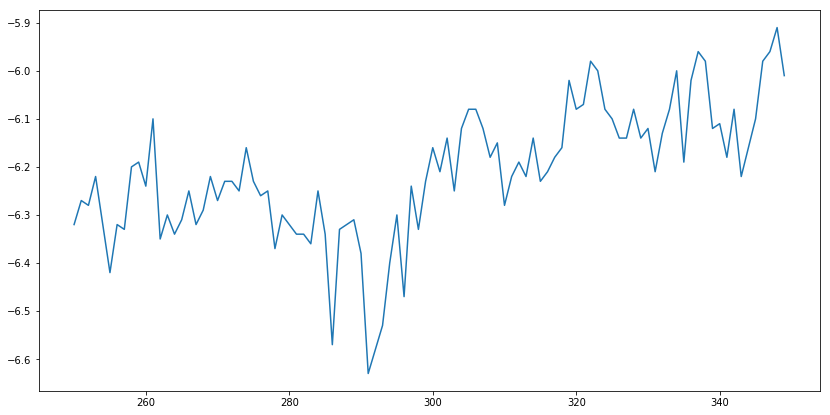

In [94]:
# 差价
a3 = df2.close - df1.close
a3.plot(figsize=(14, 7))


In [95]:
# 检验下价差的平稳性
from statsmodels.tsa.stattools import adfuller 
adftest = adfuller(a3)  # 使用adf单位根检验平稳性 
result = pd.Series(adftest[0:4], index = ['test statistic', 
                                         'p-value', 
                                         'lags used', 
                                         'number of observations used'])
for key, value in adftest[4].items():
    result['critical value (%s)'%key] = value 
    

In [92]:
result

test statistic                  -1.960053
p-value                          0.304358
lags used                        9.000000
number of observations used    340.000000
critical value (1%)             -3.449730
critical value (5%)             -2.870079
critical value (10%)            -2.571319
dtype: float64

In [96]:
result

test statistic                 -1.984700
p-value                         0.293322
lags used                       5.000000
number of observations used    94.000000
critical value (1%)            -3.501912
critical value (5%)            -2.892815
critical value (10%)           -2.583454
dtype: float64

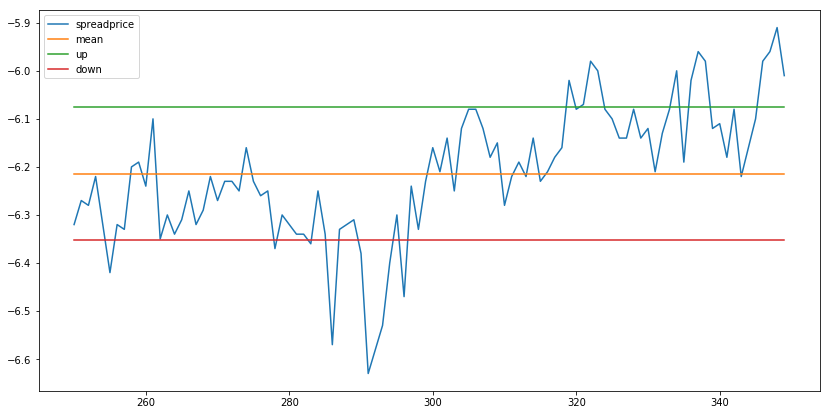

In [98]:
mean = np.mean(a3)
std = np.std(a3)
up = mean + std
down = mean - std 
time = a3.index 
mean_line = pd.Series(mean, index=time)
up_line = pd.Series(up, index=time)
down_line = pd.Series(down, index=time)

sset = pd.concat([a3, mean_line, up_line, down_line], axis=1)
sset.columns = ['spreadprice', 'mean', 'up', 'down']

sset.plot(figsize=(14, 7))

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

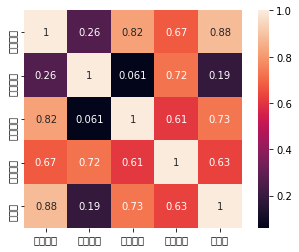

In [113]:
sns.heatmap(df_k5.iloc[:, 0:5].corr(), annot=True, square=True)
plt.show()

In [119]:
price_A = df1.close.values
price_B = df2.close.values


def check():
    result_A = adfuller(price_A)
    result_B = adfuller(price_B)
    print(result_A)
    print(result_B)    


check()    

(-3.1211591615337446, 0.025026429581293204, 3, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, -82.80636560106649)
(-2.466524048776427, 0.12383326119947291, 0, 99, {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}, -114.95022042831374)


In [ ]:
# 从结果可以看出 t-statistic 的值要大于10%，
# 所以说无法拒绝原假设，也就是原数据都是非平稳的。



In [123]:
# 一阶差分

def check(price_A, price_B):
    price_A = np.diff(price_A)
    price_B = np.diff(price_B)
    result_A = adfuller(price_A)
    result_B = adfuller(price_B)
    print(result_A)
    print(result_B)

    
    
check(price_A, price_B)

(-5.074593965716738, 1.5765292582465406e-05, 3, 95, {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}, -76.64507864370805)
(-10.290555949381451, 3.579434827479441e-18, 0, 98, {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}, -108.31635869680358)


In [124]:
#  结果可以看出，一阶差分之后的数据是平稳的，也就是说原数据是一阶单整的，
# 满足协整关系的前提，所以下一步我们对这两组数据进行协整检验，来探究两者是否是协整的。



In [125]:
# 协整检验 
from statsmodels.tsa.stattools import coint 
print(coint(price_A, price_B))

(-1.8590819482812724, 0.6006060680232064, array([-4.01048603, -3.39854434, -3.08756793]))


In [ ]:
#  结果看出 t-statistic 小于5%，所以说有95%的把握说两者具有协整关系。
# 实际上大于任何一个critical 没有协整关系 



配对交易主要分析的对象是两个品种价格之间的偏离，由均值回归理论知，在股票、期货或者其他金融衍生品的交易市场中，无论高于或低于价值中枢（或均值）都有很高的概率向价值中枢回归的趋势。所以说，在具有协整关系的这两组数据中，当它们两者的价差高与均值时则会有向低走的趋势，价差低于均值时则会有向高走的趋势。


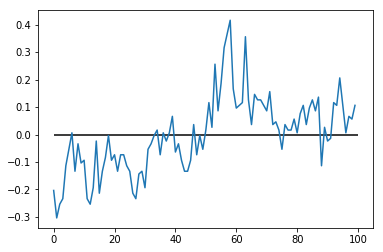

In [126]:
# 去中心化后的差价序列
def strategy():
    spread = price_A - price_B
    mspread = spread - np.mean(spread) # 去掉中心化的差价序列
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(mspread)), mspread)
    ax.hlines(0, 0, len(mspread))
    plt.show()
    
strategy()    

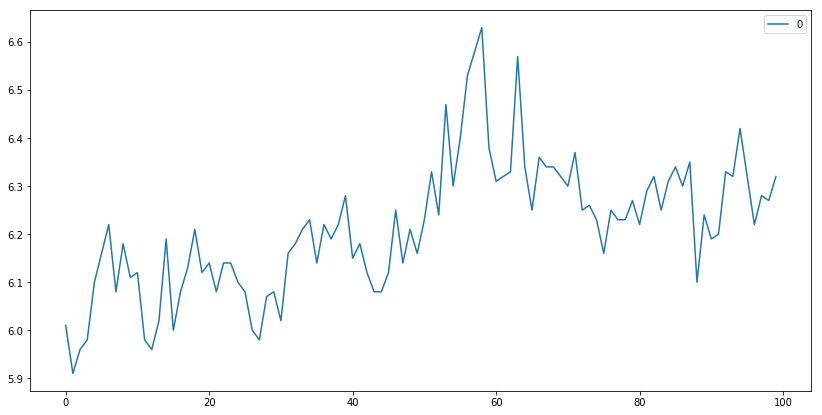

In [130]:
# spread = price_A - price_B
# pd.DataFrame(spread).plot(figsize=(14, 7))

注意这里直接研究的是 A、B 价格差值，统计套利策略中通常会将 B 价格乘以一个协整系数，研究的对象是它们的残差，由于协整检验后可以知道它们的残差具有平稳性，所以更好的应用均值回归的理论。



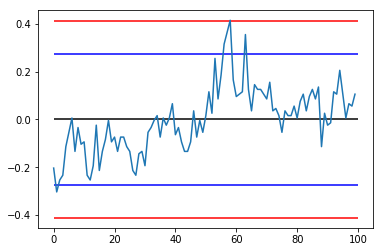

In [134]:
# 设置开仓和止损的阈值
def strategy(): 
    spread = price_A - price_B 
    mspread = spread - np.mean(spread)
    sigma = np.std(mspread)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(mspread)), mspread)
    
    ax.hlines(0, 0, len(mspread))
    ax.hlines(2 * sigma, 0, len(mspread), colors='b')
    ax.hlines(-2 * sigma, 0, len(mspread), colors='b')
    ax.hlines(3 * sigma, 0, len(mspread), colors='r')
    ax.hlines(-3 * sigma, 0, len(mspread), colors='r')

    
strategy()    

[0, 0, 0, 0, 0, 0, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0.3099999999999987, 0

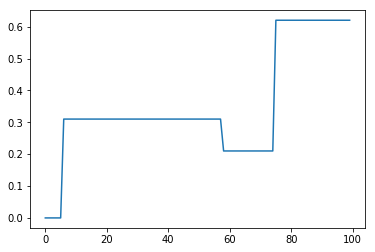

In [136]:
# 历史样本回测 
def back_test(): 
    spread = price_A - price_B
    mspread = spread - np.mean(spread)
    sigma = np.std(mspread)
    open = 2 * sigma 
    stop = 3 * sigma 
    profit_list = []
    hold = False 
    hold_price_A = 0 
    hold_price_B = 0 
    hold_state = 0 # 1 (A:long B:short)   -1 (A:short B:long)
    profit_sum = 0 
     
    for i in range(len(price_A)):
        if hold == False:
            if mspread[i] >= open:
                hold_price_A = price_A[i]
                hold_price_B = price_B[i]
                hold_state = -1
                hold = True
            elif mspread[i] <= -open:
                hold_price_A = price_A[i]
                hold_price_B = price_B[i]
                hold_state = 1
                hold = True
        else:
            if mspread[i] >= stop and hold_state == -1 :
                profit = (hold_price_A - price_A[i]) + (price_B[i] - hold_price_B)
                profit_sum += profit
                hold_state = 0
                hold = False
            if mspread[i] <= -stop and hold_state == 1 :
                profit = (price_A[i] - hold_price_A) + (hold_price_B - price_B[i])
                profit_sum += profit
                hold_state = 0
                hold = False
            if mspread[i] <= 0 and hold_state == -1:
                profit = (hold_price_A - price_A[i]) + (price_B[i] - hold_price_B)
                profit_sum += profit
                hold_state = 0
                hold = False
            if mspread[i] >= 0 and hold_state == 1:
                profit = (price_A[i] - hold_price_A) + (hold_price_B - price_B[i])
                profit_sum += profit
                hold_state = 0
                hold = False
        profit_list.append(profit_sum)
 
    print(profit_list)
 
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(profit_list)), profit_list)
    plt.show()
    return profit_list
    
    
pl = back_test()    

In [137]:
pl

[0,
 0,
 0,
 0,
 0,
 0,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999999999987,
 0.3099999

In [ ]:
# 四、注意 
# 1、为了方便操作，以上实验的策略构建以及历史回测都是样本内进行测试的，真正的策略回测要划分训练数据和测试数据，进行样本外测试。

# 2、在选择配对数据的品种时，除了要考虑配对品种的相关性之外，还要考虑品种的市场流动性等因素。

# 3、历史回测时，还需要将手续费、滑点等因素考虑进去。


# ————————————————
# 版权声明：本文为CSDN博主「敲代码的quant」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
# 原文链接：https://blog.csdn.net/FrankieHello/java/article/details/87857076